In [154]:
library(tidyverse)
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")

In [155]:
manhattanDistance <- function(vect1, vect2){
     dist <- abs(vect1 - vect2)
     dist <- sum(dist)
     return(dist)
}

In [156]:
xp_classes = read_csv("/nfs/research/irene/ysong/RESULTS/GeneCellType/GeneSpectra/zebrafish_xenopus_embryo/run_classification/xenopus_gene_name_ct_final.csv")

New names:
• `gene` -> `gene...1`
• `gene` -> `gene...11`
Rows: 9661 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): gene...1, groups_expressed, groups_not_expressed, gene...11, exps_...
dbl (15): mean_exp, min_exp, max_exp, max_2nd, n_exp, frac_exp, lim, n_over,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [157]:
xp_tbl = xp_classes %>% filter(spec_category %in% c("cell type enriched", "group enriched")) %>% 
select(gene...1, enrichment_group, spec_score) %>% separate_rows(enrichment_group, sep=";")

In [158]:
head(xp_tbl)

gene...1,enrichment_group,spec_score
<chr>,<chr>,<dbl>
aco2,Blastula,6.559680
agr3,Cement_gland_primordium,9.167393
angpt4,Goblet_cell,7.573803
angpt4,Hatching_gland,7.573803
ano1,Small_secretory_cells,16.506905
anxa6,Skeletal_muscle,6.402264


In [159]:
dim(xp_tbl)

[1] 729   3

In [160]:
dr_classes = read_csv("/nfs/research/irene/ysong/RESULTS/GeneCellType/GeneSpectra/zebrafish_xenopus_embryo/run_classification/zebrafish_gene_name_ct_final.csv")

New names:
• `gene` -> `gene...1`
• `gene` -> `gene...11`
Rows: 17330 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): gene...1, groups_expressed, groups_not_expressed, gene...11, exps_...
dbl (15): mean_exp, min_exp, max_exp, max_2nd, n_exp, frac_exp, lim, n_over,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [161]:
dim(dr_classes)

[1] 17330    26

In [162]:
dr_tbl = dr_classes %>% filter(spec_category %in% c("cell type enriched", "group enriched")) %>% 
select(gene...1, enrichment_group, spec_score) %>% separate_rows(enrichment_group, sep=";")

In [163]:
head(dr_tbl)

gene...1,enrichment_group,spec_score
<chr>,<chr>,<dbl>
adgb,Pancreas_primordium,8.145725
aff3,Notochord,6.879883
agrn,Epiphysis,5.697775
ahsa1a,Skeletal_muscle,6.805574
armc1,Nanog_high,5.801775
bnip3lb,Pancreas_primordium,4.081164


In [164]:
dim(dr_tbl)

[1] 1344    3

In [165]:
keep = (intersect(levels(factor(xp_tbl$enrichment_group)), levels(factor(dr_tbl$enrichment_group))))

In [166]:
keep

[1] "Blastula"                 "Blood"                   
 [3] "Endoderm"                 "Endothelial"             
 [5] "Epidermal_progenitor"     "Eye_primordium"          
 [7] "Forebrain_midbrain"       "Germline"                
 [9] "Hatching_gland"           "Heart"                   
[11] "Hindbrain"                "Intermediate_mesoderm"   
[13] "Involuting_marginal_zone" "Ionocyte"                
[15] "Lens"                     "Neural_crest"            
[17] "Neuroectoderm"            "Neuron"                  
[19] "Non_neural_ectoderm"      "Notochord"               
[21] "Notoplate"                "Olfactory_placode"       
[23] "Optic"                    "Otic_placode"            
[25] "Placodal_area"            "Presomitic_mesoderm"     
[27] "Rohon_beard_neuron"       "Skeletal_muscle"         
[29] "Tailbud"

In [167]:
xp_tbl = xp_tbl %>% filter(enrichment_group %in% keep)
dr_tbl = dr_tbl %>% filter(enrichment_group %in% keep)

In [168]:
length(levels(factor(xp_tbl$enrichment_group)))

[1] 29

In [169]:
length(levels(factor(dr_tbl$enrichment_group)))

[1] 29

In [170]:
# assign orthologous groups to the 2 species, use mapping table of name to ensembl peptide to OG

In [171]:
getwd()
setwd("/nfs/research/irene/ysong/RESULTS/GeneCellType/GeneSpectra/zebrafish_xenopus_embryo/analyse_blast_vs_spec")

[1] "/nfs/research/irene/ysong/RESULTS/GeneCellType/GeneSpectra/zebrafish_xenopus_embryo/analyse_blast_vs_spec"

In [172]:
ortho = read_csv("drerio_xtropialis_ensembl_orthology_filtered.csv") %>% drop_na()

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 19945 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ensembl_gene_id, external_gene_name, ensembl_peptide_id, xtropical...
dbl (10): chromosome_name, start_position, end_position, xtropicalis_homolog...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [173]:
ortho
dim(ortho)

ensembl_gene_id,external_gene_name,chromosome_name,start_position,end_position,ensembl_peptide_id,xtropicalis_homolog_ensembl_gene,xtropicalis_homolog_associated_gene_name,xtropicalis_homolog_ensembl_peptide,xtropicalis_homolog_chromosome,xtropicalis_homolog_chrom_start,xtropicalis_homolog_chrom_end,xtropicalis_homolog_subtype,xtropicalis_homolog_orthology_type,xtropicalis_homolog_perc_id,xtropicalis_homolog_perc_id_r1,xtropicalis_homolog_goc_score,xtropicalis_homolog_wga_coverage,xtropicalis_homolog_orthology_confidence
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSDARG00000103391,rab9b,14,14603731,14607855,ENSDARP00000140695,ENSXETG00000018133,rab9b,ENSXETP00000039329,8,16957503,16961130,Euteleostomi,ortholog_one2one,75.2475,75.6219,25,100.00,1
ENSDARG00000103391,rab9b,14,14603731,14607855,ENSDARP00000147450,ENSXETG00000018133,rab9b,ENSXETP00000039329,8,16957503,16961130,Euteleostomi,ortholog_one2one,75.2475,75.6219,25,100.00,1
ENSDARG00000075759,samd4a,17,15033822,15117508,ENSDARP00000129251,ENSXETG00000012217,samd4a,ENSXETP00000073845,8,74362645,74457225,Gnathostomata,ortholog_one2one,70.0581,67.6966,50,80.53,1
ENSDARG00000075759,samd4a,17,15033822,15117508,ENSDARP00000101105,ENSXETG00000012217,samd4a,ENSXETP00000073845,8,74362645,74457225,Gnathostomata,ortholog_one2one,70.0581,67.6966,50,80.53,1
ENSDARG00000044573,cdc42,11,39120306,39148199,ENSDARP00000129339,ENSXETG00000004743,cdc42,ENSXETP00000030366,7,68594070,68619099,Chordata,ortholog_one2one,98.4293,88.6792,75,94.10,1
ENSDARG00000044573,cdc42,11,39120306,39148199,ENSDARP00000129719,ENSXETG00000004743,cdc42,ENSXETP00000030366,7,68594070,68619099,Chordata,ortholog_one2one,98.4293,88.6792,75,94.10,1
ENSDARG00000044573,cdc42,11,39120306,39148199,ENSDARP00000149720,ENSXETG00000004743,cdc42,ENSXETP00000030366,7,68594070,68619099,Chordata,ortholog_one2one,98.4293,88.6792,75,94.10,1
ENSDARG00000044573,cdc42,11,39120306,39148199,ENSDARP00000155235,ENSXETG00000004743,cdc42,ENSXETP00000030366,7,68594070,68619099,Chordata,ortholog_one2one,98.4293,88.6792,75,94.10,1
ENSDARG00000076270,adamts13,8,45226586,45279411,ENSDARP00000119445,ENSXETG00000006882,adamts13,ENSXETP00000070357,KV460557.1,60725,78242,Euteleostomi,ortholog_one2one,38.6515,42.8889,0,35.79,0


[1] 18024    19

In [174]:
xt_pep = read_csv("../run_classification/xtropicalis_v9.1_ensemblr106_gene_pep_name.csv")

Rows: 33534 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ensembl_gene_id, ensembl_peptide_id, external_gene_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [175]:
dr_pep = read_csv("../run_classification/drerio_GRCz10_ensemblr80_gene_pep_name.csv")

Rows: 34536 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ensembl_gene_id, ensembl_peptide_id, external_gene_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [176]:
head(xt_pep)

ensembl_gene_id,ensembl_peptide_id,external_gene_name
<chr>,<chr>,<chr>
ENSXETG00000024002,ENSXETP00000081463,b4galt5
ENSXETG00000024002,ENSXETP00000051778,b4galt5
ENSXETG00000024002,ENSXETP00000074250,b4galt5
ENSXETG00000015752,ENSXETP00000034329,dnajb9
ENSXETG00000008073,ENSXETP00000077362,lrp8
ENSXETG00000008073,ENSXETP00000082343,lrp8


In [177]:
head(ortho)

ensembl_gene_id,external_gene_name,chromosome_name,start_position,end_position,ensembl_peptide_id,xtropicalis_homolog_ensembl_gene,xtropicalis_homolog_associated_gene_name,xtropicalis_homolog_ensembl_peptide,xtropicalis_homolog_chromosome,xtropicalis_homolog_chrom_start,xtropicalis_homolog_chrom_end,xtropicalis_homolog_subtype,xtropicalis_homolog_orthology_type,xtropicalis_homolog_perc_id,xtropicalis_homolog_perc_id_r1,xtropicalis_homolog_goc_score,xtropicalis_homolog_wga_coverage,xtropicalis_homolog_orthology_confidence
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSDARG00000103391,rab9b,14,14603731,14607855,ENSDARP00000140695,ENSXETG00000018133,rab9b,ENSXETP00000039329,8,16957503,16961130,Euteleostomi,ortholog_one2one,75.2475,75.6219,25,100.00,1
ENSDARG00000103391,rab9b,14,14603731,14607855,ENSDARP00000147450,ENSXETG00000018133,rab9b,ENSXETP00000039329,8,16957503,16961130,Euteleostomi,ortholog_one2one,75.2475,75.6219,25,100.00,1
ENSDARG00000075759,samd4a,17,15033822,15117508,ENSDARP00000129251,ENSXETG00000012217,samd4a,ENSXETP00000073845,8,74362645,74457225,Gnathostomata,ortholog_one2one,70.0581,67.6966,50,80.53,1
ENSDARG00000075759,samd4a,17,15033822,15117508,ENSDARP00000101105,ENSXETG00000012217,samd4a,ENSXETP00000073845,8,74362645,74457225,Gnathostomata,ortholog_one2one,70.0581,67.6966,50,80.53,1
ENSDARG00000044573,cdc42,11,39120306,39148199,ENSDARP00000129339,ENSXETG00000004743,cdc42,ENSXETP00000030366,7,68594070,68619099,Chordata,ortholog_one2one,98.4293,88.6792,75,94.10,1
ENSDARG00000044573,cdc42,11,39120306,39148199,ENSDARP00000129719,ENSXETG00000004743,cdc42,ENSXETP00000030366,7,68594070,68619099,Chordata,ortholog_one2one,98.4293,88.6792,75,94.10,1


In [178]:
head(xp_tbl)

gene...1,enrichment_group,spec_score
<chr>,<chr>,<dbl>
aco2,Blastula,6.559680
angpt4,Hatching_gland,7.573803
anxa6,Skeletal_muscle,6.402264
arl8a,Neuron,4.297332
arl8a,Rohon_beard_neuron,4.297332
atp6v1f,Ionocyte,6.035753


In [179]:
xp_merged = ortho %>% merge(xt_pep, by.x = 'xtropicalis_homolog_ensembl_peptide', by.y = 'ensembl_peptide_id') %>% 
merge(xp_tbl, by.x = 'xtropicalis_homolog_associated_gene_name', by.y='gene...1')

dim(xp_merged)

[1] 1154   23

In [180]:
head(xp_merged)

,xtropicalis_homolog_associated_gene_name,xtropicalis_homolog_ensembl_peptide,ensembl_gene_id.x,external_gene_name.x,chromosome_name,start_position,end_position,ensembl_peptide_id,xtropicalis_homolog_ensembl_gene,xtropicalis_homolog_chromosome,xtropicalis_homolog_chrom_start,xtropicalis_homolog_chrom_end,xtropicalis_homolog_subtype,xtropicalis_homolog_orthology_type,xtropicalis_homolog_perc_id,xtropicalis_homolog_perc_id_r1,xtropicalis_homolog_goc_score,xtropicalis_homolog_wga_coverage,xtropicalis_homolog_orthology_confidence,ensembl_gene_id.y,external_gene_name.y,enrichment_group,spec_score
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,aadac,ENSXETP00000044594,ENSDARG00000063621,aadac,15,1045374,1066269,ENSDARP00000087565,ENSXETG00000020639,5,106348080,106357959,Gnathostomata,ortholog_one2one,49.1484,50.12410,50,88.54,1,ENSXETG00000020639,aadac,Hatching_gland,5.426394
2,aadac,ENSXETP00000079024,ENSDARG00000089000,taar1b,20,46127591,46128590,ENSDARP00000112358,ENSXETG00000039183,5,35841605,35842624,Euteleostomi,ortholog_one2one,49.0964,48.08260,0,94.26,1,ENSXETG00000039183,aadac,Hatching_gland,5.426394
3,abca1,ENSXETP00000078902,ENSDARG00000079009,abca1b,14,6423973,6519076,ENSDARP00000124570,ENSXETG00000000951,1,107794563,107867244,Vertebrata,ortholog_one2many,71.8310,4.41367,25,79.82,0,ENSXETG00000000951,abca1,Lens,4.163734
4,abca1,ENSXETP00000078902,ENSDARG00000074635,abca1a,1,52560549,52628407,ENSDARP00000114226,ENSXETG00000000951,1,107794563,107867244,Vertebrata,ortholog_one2many,74.8677,73.47470,0,89.63,1,ENSXETG00000000951,abca1,Lens,4.163734
5,abca1,ENSXETP00000078902,ENSDARG00000079009,abca1b,14,6423973,6519076,ENSDARP00000124504,ENSXETG00000000951,1,107794563,107867244,Vertebrata,ortholog_one2many,71.8310,4.41367,25,79.82,0,ENSXETG00000000951,abca1,Lens,4.163734
6,abca1,ENSXETP00000078902,ENSDARG00000079009,abca1b,14,6423973,6519076,ENSDARP00000051555,ENSXETG00000000951,1,107794563,107867244,Vertebrata,ortholog_one2many,71.8310,4.41367,25,79.82,0,ENSXETG00000000951,abca1,Lens,4.163734


In [181]:
xp_merged = xp_merged %>% rename(ensembl_gene_id_drerio = ensembl_gene_id.x, external_gene_name_drerio = external_gene_name.x) %>% select(-c(ensembl_gene_id.y, external_gene_name.y))

In [182]:
ortho %>% merge(dr_pep, by.x = 'ensembl_peptide_id', by.y = 'ensembl_peptide_id') %>% head()

,ensembl_peptide_id,ensembl_gene_id.x,external_gene_name.x,chromosome_name,start_position,end_position,xtropicalis_homolog_ensembl_gene,xtropicalis_homolog_associated_gene_name,xtropicalis_homolog_ensembl_peptide,xtropicalis_homolog_chromosome,xtropicalis_homolog_chrom_start,xtropicalis_homolog_chrom_end,xtropicalis_homolog_subtype,xtropicalis_homolog_orthology_type,xtropicalis_homolog_perc_id,xtropicalis_homolog_perc_id_r1,xtropicalis_homolog_goc_score,xtropicalis_homolog_wga_coverage,xtropicalis_homolog_orthology_confidence,ensembl_gene_id.y,external_gene_name.y
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSDARP00000000004,ENSDARG00000000001,slc35a5,9,34112067,34121839,ENSXETG00000002426,slc35a5,ENSXETP00000005173,2,68730831,68745250,Euteleostomi,ortholog_one2one,55.0000,58.1731,75,80.68,1,ENSDARG00000000001,slc35a5
2,ENSDARP00000000042,ENSDARG00000033231,mcm6l,2,50199738,50225495,ENSXETG00000015671,mcm6,ENSXETP00000081197,6,67891820,67939523,Euteleostomi,ortholog_one2one,75.2427,74.1627,0,77.39,1,ENSDARG00000033231,mcm6l
3,ENSDARP00000000070,ENSDARG00000000069,dap,24,22070290,22103585,ENSXETG00000025633,dap,ENSXETP00000019272,6,39156693,39202537,Euteleostomi,ortholog_one2one,62.8571,62.2642,75,78.33,1,ENSDARG00000000069,dap
4,ENSDARP00000000198,ENSDARG00000000189,sema6e,16,30002605,30271444,ENSXETG00000005837,sema6c,ENSXETP00000079276,8,114217865,114359294,Vertebrata,ortholog_one2many,54.6053,58.3333,50,71.42,1,ENSDARG00000000189,sema6e
5,ENSDARP00000000250,ENSDARG00000000241,slc40a1,9,41103127,41113878,ENSXETG00000009874,slc40a1,ENSXETP00000021742,9,39463016,39480333,Euteleostomi,ortholog_one2one,70.9964,69.2708,50,90.05,1,ENSDARG00000000241,slc40a1
6,ENSDARP00000000280,ENSDARG00000076182,stat1b,9,41218967,41247197,ENSXETG00000004649,stat1,ENSXETP00000016638,9,43671531,43888376,Euteleostomi,ortholog_one2many,56.5517,54.5939,25,35.26,0,ENSDARG00000076182,stat1b


In [183]:
dr_merged = ortho %>% merge(dr_pep, by.x = 'ensembl_peptide_id', by.y = 'ensembl_peptide_id') %>% 
merge(dr_tbl, by.x = 'external_gene_name.x', by.y='gene...1')

In [184]:
head(dr_merged)

,external_gene_name.x,ensembl_peptide_id,ensembl_gene_id.x,chromosome_name,start_position,end_position,xtropicalis_homolog_ensembl_gene,xtropicalis_homolog_associated_gene_name,xtropicalis_homolog_ensembl_peptide,xtropicalis_homolog_chromosome,xtropicalis_homolog_chrom_start,xtropicalis_homolog_chrom_end,xtropicalis_homolog_subtype,xtropicalis_homolog_orthology_type,xtropicalis_homolog_perc_id,xtropicalis_homolog_perc_id_r1,xtropicalis_homolog_goc_score,xtropicalis_homolog_wga_coverage,xtropicalis_homolog_orthology_confidence,ensembl_gene_id.y,external_gene_name.y,enrichment_group,spec_score
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,acp5a,ENSDARP00000017532,ENSDARG00000019763,6,8355122,8362516,ENSXETG00000016725,acp5,ENSXETP00000036485,3,128526880,128539937,Euteleostomi,ortholog_one2one,54.5723,56.7485,0,87.58,1,ENSDARG00000019763,acp5a,Blastula,13.737337
2,acp5a,ENSDARP00000120243,ENSDARG00000019763,6,8355122,8362516,ENSXETG00000016725,acp5,ENSXETP00000036485,3,128526880,128539937,Euteleostomi,ortholog_one2one,54.5723,56.7485,0,87.58,1,ENSDARG00000019763,acp5a,Blastula,13.737337
3,acp5a,ENSDARP00000119538,ENSDARG00000019763,6,8355122,8362516,ENSXETG00000016725,acp5,ENSXETP00000036485,3,128526880,128539937,Euteleostomi,ortholog_one2one,54.5723,56.7485,0,87.58,1,ENSDARG00000019763,acp5a,Blastula,13.737337
4,actn3a,ENSDARP00000005224,ENSDARG00000013755,21,27382893,27404978,ENSXETG00000011409,actn3,ENSXETP00000065529,4,36805358,36845836,Euteleostomi,ortholog_one2many,86.2723,84.9451,0,97.08,1,ENSDARG00000013755,actn3a,Skeletal_muscle,10.904691
5,actn3b,ENSDARP00000000803,ENSDARG00000001431,7,6969909,7133475,ENSXETG00000011409,actn3,ENSXETP00000065529,4,36805358,36845836,Euteleostomi,ortholog_one2many,87.6392,86.4835,0,92.72,1,ENSDARG00000001431,actn3b,Skeletal_muscle,17.138433
6,afap1l1b,ENSDARP00000073410,ENSDARG00000056453,21,30418034,30467905,ENSXETG00000032942,afap1l1,ENSXETP00000096602,3,31631028,31669797,Euteleostomi,ortholog_one2many,57.9576,57.7279,25,64.66,1,ENSDARG00000056453,afap1l1b,Endothelial,7.122953


In [185]:
dim(dr_merged)

[1] 659  23

In [186]:
dr_merged = dr_merged %>% rename(ensembl_gene_id_drerio = ensembl_gene_id.x, external_gene_name_drerio = external_gene_name.x) %>% select(-c(ensembl_gene_id.y, external_gene_name.y))

In [187]:
library(lsa)

In [236]:

## Generate cosine sim using ensembl peptide id

In [237]:
species_1 = 'drerio'
species_2 = 'xtropicalis'

In [238]:
species_1_short = substr(species_1, start = 1, stop = 2)
species_2_short = substr(species_2, start = 1, stop = 2)

message(species_1)
message(species_2)

drerio

xtropicalis



In [239]:
sp1_tbl = dr_merged
sp2_tbl = xp_merged

In [240]:
head(sp1_tbl)

,external_gene_name_drerio,ensembl_peptide_id,ensembl_gene_id_drerio,chromosome_name,start_position,end_position,xtropicalis_homolog_ensembl_gene,xtropicalis_homolog_associated_gene_name,xtropicalis_homolog_ensembl_peptide,xtropicalis_homolog_chromosome,xtropicalis_homolog_chrom_start,xtropicalis_homolog_chrom_end,xtropicalis_homolog_subtype,xtropicalis_homolog_orthology_type,xtropicalis_homolog_perc_id,xtropicalis_homolog_perc_id_r1,xtropicalis_homolog_goc_score,xtropicalis_homolog_wga_coverage,xtropicalis_homolog_orthology_confidence,enrichment_group,spec_score
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,acp5a,ENSDARP00000017532,ENSDARG00000019763,6,8355122,8362516,ENSXETG00000016725,acp5,ENSXETP00000036485,3,128526880,128539937,Euteleostomi,ortholog_one2one,54.5723,56.7485,0,87.58,1,Blastula,13.737337
2,acp5a,ENSDARP00000120243,ENSDARG00000019763,6,8355122,8362516,ENSXETG00000016725,acp5,ENSXETP00000036485,3,128526880,128539937,Euteleostomi,ortholog_one2one,54.5723,56.7485,0,87.58,1,Blastula,13.737337
3,acp5a,ENSDARP00000119538,ENSDARG00000019763,6,8355122,8362516,ENSXETG00000016725,acp5,ENSXETP00000036485,3,128526880,128539937,Euteleostomi,ortholog_one2one,54.5723,56.7485,0,87.58,1,Blastula,13.737337
4,actn3a,ENSDARP00000005224,ENSDARG00000013755,21,27382893,27404978,ENSXETG00000011409,actn3,ENSXETP00000065529,4,36805358,36845836,Euteleostomi,ortholog_one2many,86.2723,84.9451,0,97.08,1,Skeletal_muscle,10.904691
5,actn3b,ENSDARP00000000803,ENSDARG00000001431,7,6969909,7133475,ENSXETG00000011409,actn3,ENSXETP00000065529,4,36805358,36845836,Euteleostomi,ortholog_one2many,87.6392,86.4835,0,92.72,1,Skeletal_muscle,17.138433
6,afap1l1b,ENSDARP00000073410,ENSDARG00000056453,21,30418034,30467905,ENSXETG00000032942,afap1l1,ENSXETP00000096602,3,31631028,31669797,Euteleostomi,ortholog_one2many,57.9576,57.7279,25,64.66,1,Endothelial,7.122953


In [241]:
sp1_tbl_shared_wide = sp1_tbl %>% 
pivot_wider(id_cols = c(ensembl_peptide_id), names_from = enrichment_group, values_from = spec_score, values_fn = first, values_fill = 0)

In [242]:
head(sp1_tbl_shared_wide)

ensembl_peptide_id,Blastula,Skeletal_muscle,Endothelial,Ionocyte,Blood,Epidermal_progenitor,Olfactory_placode,Rohon_beard_neuron,Neuron,Hatching_gland,Germline,Notoplate,Placodal_area,Otic_placode,Heart,Notochord,Lens,Optic,Neural_crest,Presomitic_mesoderm,Intermediate_mesoderm,Endoderm,Involuting_marginal_zone,Hindbrain,Forebrain_midbrain,Eye_primordium,Neuroectoderm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSDARP00000017532,13.73734,0.00000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSDARP00000120243,13.73734,0.00000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSDARP00000119538,13.73734,0.00000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSDARP00000005224,0.00000,10.90469,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSDARP00000000803,0.00000,17.13843,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSDARP00000073410,0.00000,0.00000,7.122953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [243]:
head(sp2_tbl)

,xtropicalis_homolog_associated_gene_name,xtropicalis_homolog_ensembl_peptide,ensembl_gene_id_drerio,external_gene_name_drerio,chromosome_name,start_position,end_position,ensembl_peptide_id,xtropicalis_homolog_ensembl_gene,xtropicalis_homolog_chromosome,xtropicalis_homolog_chrom_start,xtropicalis_homolog_chrom_end,xtropicalis_homolog_subtype,xtropicalis_homolog_orthology_type,xtropicalis_homolog_perc_id,xtropicalis_homolog_perc_id_r1,xtropicalis_homolog_goc_score,xtropicalis_homolog_wga_coverage,xtropicalis_homolog_orthology_confidence,enrichment_group,spec_score
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,aadac,ENSXETP00000044594,ENSDARG00000063621,aadac,15,1045374,1066269,ENSDARP00000087565,ENSXETG00000020639,5,106348080,106357959,Gnathostomata,ortholog_one2one,49.1484,50.12410,50,88.54,1,Hatching_gland,5.426394
2,aadac,ENSXETP00000079024,ENSDARG00000089000,taar1b,20,46127591,46128590,ENSDARP00000112358,ENSXETG00000039183,5,35841605,35842624,Euteleostomi,ortholog_one2one,49.0964,48.08260,0,94.26,1,Hatching_gland,5.426394
3,abca1,ENSXETP00000078902,ENSDARG00000079009,abca1b,14,6423973,6519076,ENSDARP00000124570,ENSXETG00000000951,1,107794563,107867244,Vertebrata,ortholog_one2many,71.8310,4.41367,25,79.82,0,Lens,4.163734
4,abca1,ENSXETP00000078902,ENSDARG00000074635,abca1a,1,52560549,52628407,ENSDARP00000114226,ENSXETG00000000951,1,107794563,107867244,Vertebrata,ortholog_one2many,74.8677,73.47470,0,89.63,1,Lens,4.163734
5,abca1,ENSXETP00000078902,ENSDARG00000079009,abca1b,14,6423973,6519076,ENSDARP00000124504,ENSXETG00000000951,1,107794563,107867244,Vertebrata,ortholog_one2many,71.8310,4.41367,25,79.82,0,Lens,4.163734
6,abca1,ENSXETP00000078902,ENSDARG00000079009,abca1b,14,6423973,6519076,ENSDARP00000051555,ENSXETG00000000951,1,107794563,107867244,Vertebrata,ortholog_one2many,71.8310,4.41367,25,79.82,0,Lens,4.163734


In [244]:
sp2_tbl_shared_wide = sp2_tbl %>% 
pivot_wider(id_cols = c(	xtropicalis_homolog_ensembl_peptide), names_from = enrichment_group, values_from = spec_score, values_fn = first, values_fill = 0)

In [245]:
head(sp2_tbl_shared_wide)

xtropicalis_homolog_ensembl_peptide,Hatching_gland,Lens,Blastula,Skeletal_muscle,Germline,Blood,Rohon_beard_neuron,Neuron,Endothelial,Notoplate,Forebrain_midbrain,Ionocyte,Epidermal_progenitor,Endoderm,Notochord,Olfactory_placode,Involuting_marginal_zone,Otic_placode,Optic,Eye_primordium,Neuroectoderm,Non_neural_ectoderm,Intermediate_mesoderm,Heart,Neural_crest,Tailbud,Presomitic_mesoderm,Placodal_area,Hindbrain
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSXETP00000044594,5.426394,0.000000,0.000000,0.00000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSXETP00000079024,5.426394,0.000000,0.000000,0.00000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSXETP00000078902,0.000000,4.163734,0.000000,0.00000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSXETP00000061068,0.000000,0.000000,6.559680,0.00000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSXETP00000065529,0.000000,0.000000,0.000000,62.30551,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSXETP00000068130,0.000000,0.000000,4.340344,0.00000,4.340344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [246]:
setdiff(colnames(sp1_tbl_shared_wide), colnames(sp2_tbl_shared_wide))
setdiff(colnames(sp2_tbl_shared_wide), colnames(sp1_tbl_shared_wide))

[1] "ensembl_peptide_id"

[1] "xtropicalis_homolog_ensembl_peptide" "Non_neural_ectoderm"                
[3] "Tailbud"

In [247]:
sp1_tbl_shared_wide$Non_neural_ectoderm = 0
sp1_tbl_shared_wide$Tailbud = 0

In [248]:
sp1_tbl_shared_wide_t = t(sp1_tbl_shared_wide)
head(sp1_tbl_shared_wide_t)

ensembl_peptide_id,ENSDARP00000017532,ENSDARP00000120243,ENSDARP00000119538,ENSDARP00000005224,ENSDARP00000000803,ENSDARP00000073410,ENSDARP00000073406,ENSDARP00000091026,ENSDARP00000116390,ENSDARP00000032736,ENSDARP00000115845,ENSDARP00000127255,ENSDARP00000112808,ENSDARP00000013777,ENSDARP00000136768,ENSDARP00000056419,ENSDARP00000124518,ENSDARP00000096118,ENSDARP00000026627,ENSDARP00000124325,ENSDARP00000066381,ENSDARP00000057376,ENSDARP00000116437,ENSDARP00000015397,ENSDARP00000024272,⋯,ENSDARP00000101780,ENSDARP00000120079,ENSDARP00000016261,ENSDARP00000114047,ENSDARP00000101000,ENSDARP00000109848,ENSDARP00000040073,ENSDARP00000121512,ENSDARP00000126447,ENSDARP00000126564,ENSDARP00000128871,ENSDARP00000141581,ENSDARP00000131069,ENSDARP00000069680,ENSDARP00000069673,ENSDARP00000113359,ENSDARP00000009334,ENSDARP00000125627,ENSDARP00000126957,ENSDARP00000098360,ENSDARP00000123754,ENSDARP00000124210,ENSDARP00000093657,ENSDARP00000129579,ENSDARP00000012567
Blastula,13.737337,13.737337,13.737337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,4.596660,4.596660,4.596660,4.596660,4.596660,7.055474,4.206036,12.086130,12.086130,12.086130,4.523188,5.126777,5.126777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Skeletal_muscle,0.000000,0.000000,0.000000,10.904691,17.138433,0.000000,0.000000,0.000000,0.000000,6.805574,6.805574,6.805574,6.805574,4.612214,0.000000,0.000000,10.495477,10.495477,10.495477,7.701164,0.000000,0.000000,0.000000,0.000000,10.690835,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Endothelial,0.000000,0.000000,0.000000,0.000000,0.000000,7.122953,7.122953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.841717,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ionocyte,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.377529,24.377529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.058607,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Blood,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.564951,34.397060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.720072,5.720072


In [250]:
colnames(sp1_tbl_shared_wide_t) = sp1_tbl_shared_wide_t['ensembl_peptide_id', ]

In [251]:
sp1_tbl_shared_wide_t = sp1_tbl_shared_wide_t[2:nrow(sp1_tbl_shared_wide_t), ]
head(sp1_tbl_shared_wide_t)

,ENSDARP00000017532,ENSDARP00000120243,ENSDARP00000119538,ENSDARP00000005224,ENSDARP00000000803,ENSDARP00000073410,ENSDARP00000073406,ENSDARP00000091026,ENSDARP00000116390,ENSDARP00000032736,ENSDARP00000115845,ENSDARP00000127255,ENSDARP00000112808,ENSDARP00000013777,ENSDARP00000136768,ENSDARP00000056419,ENSDARP00000124518,ENSDARP00000096118,ENSDARP00000026627,ENSDARP00000124325,ENSDARP00000066381,ENSDARP00000057376,ENSDARP00000116437,ENSDARP00000015397,ENSDARP00000024272,⋯,ENSDARP00000101780,ENSDARP00000120079,ENSDARP00000016261,ENSDARP00000114047,ENSDARP00000101000,ENSDARP00000109848,ENSDARP00000040073,ENSDARP00000121512,ENSDARP00000126447,ENSDARP00000126564,ENSDARP00000128871,ENSDARP00000141581,ENSDARP00000131069,ENSDARP00000069680,ENSDARP00000069673,ENSDARP00000113359,ENSDARP00000009334,ENSDARP00000125627,ENSDARP00000126957,ENSDARP00000098360,ENSDARP00000123754,ENSDARP00000124210,ENSDARP00000093657,ENSDARP00000129579,ENSDARP00000012567
Blastula,13.737337,13.737337,13.737337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,4.596660,4.596660,4.596660,4.596660,4.596660,7.055474,4.206036,12.086130,12.086130,12.086130,4.523188,5.126777,5.126777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Skeletal_muscle,0.000000,0.000000,0.000000,10.904691,17.138433,0.000000,0.000000,0.000000,0.000000,6.805574,6.805574,6.805574,6.805574,4.612214,0.000000,0.000000,10.495477,10.495477,10.495477,7.701164,0.000000,0.000000,0.000000,0.000000,10.690835,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Endothelial,0.000000,0.000000,0.000000,0.000000,0.000000,7.122953,7.122953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.841717,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ionocyte,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.377529,24.377529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.058607,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Blood,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.564951,34.397060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.720072,5.720072
Epidermal_progenitor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.941458,4.941458,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.453654,4.453654,4.453654,0.000000,0.000000


In [252]:
sp2_tbl_shared_wide_t = t(sp2_tbl_shared_wide)
colnames(sp2_tbl_shared_wide_t) = sp2_tbl_shared_wide_t['xtropicalis_homolog_ensembl_peptide', ]
sp2_tbl_shared_wide_t = sp2_tbl_shared_wide_t[2:nrow(sp2_tbl_shared_wide_t), ]

In [253]:
head(sp2_tbl_shared_wide_t)

,ENSXETP00000044594,ENSXETP00000079024,ENSXETP00000078902,ENSXETP00000061068,ENSXETP00000065529,ENSXETP00000068130,ENSXETP00000047667,ENSXETP00000045235,ENSXETP00000097777,ENSXETP00000092322,ENSXETP00000058904,ENSXETP00000047047,ENSXETP00000066507,ENSXETP00000093538,ENSXETP00000099104,ENSXETP00000017542,ENSXETP00000001981,ENSXETP00000091373,ENSXETP00000000374,ENSXETP00000036690,ENSXETP00000013118,ENSXETP00000053762,ENSXETP00000072463,ENSXETP00000024518,ENSXETP00000065949,⋯,ENSXETP00000018775,ENSXETP00000057086,ENSXETP00000089823,ENSXETP00000039092,ENSXETP00000077924,ENSXETP00000072584,ENSXETP00000048248,ENSXETP00000063244,ENSXETP00000034209,ENSXETP00000098068,ENSXETP00000022798,ENSXETP00000015787,ENSXETP00000083946,ENSXETP00000095377,ENSXETP00000060084,ENSXETP00000056634,ENSXETP00000072244,ENSXETP00000086341,ENSXETP00000025606,ENSXETP00000007804,ENSXETP00000027937,ENSXETP00000090117,ENSXETP00000071474,ENSXETP00000042631,ENSXETP00000015972
Hatching_gland,5.426394,5.426394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.105776,6.105776,11.304907,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.226168,4.226168,0.000000,0.000000,0.000000,0.000000,0.000000,6.393897,6.393897,0.000000,0.000000
Lens,0.000000,0.000000,4.163734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Blastula,0.000000,0.000000,0.000000,6.559680,0.000000,4.340344,0.000000,4.077298,7.914208,0.000000,0.000000,0.000000,0.000000,0.000000,7.972182,0.000000,0.000000,0.000000,4.547237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.945542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.380133,0.000000,0.000000,0.000000,0.000000,6.418294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Skeletal_muscle,0.000000,0.000000,0.000000,0.000000,62.305508,0.000000,0.000000,0.000000,0.000000,4.382057,0.000000,0.000000,0.000000,6.402264,0.000000,22.029018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,13.638012,13.638012,0.000000,7.607843,7.607843,0.000000,0.000000,4.848586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Germline,0.000000,0.000000,0.000000,0.000000,0.000000,4.340344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.972182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.380133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Blood,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.450371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [254]:
sp2_tbl_shared_wide_t = sp2_tbl_shared_wide_t[rownames(sp1_tbl_shared_wide_t), ]

In [255]:
head(sp2_tbl_shared_wide_t)

,ENSXETP00000044594,ENSXETP00000079024,ENSXETP00000078902,ENSXETP00000061068,ENSXETP00000065529,ENSXETP00000068130,ENSXETP00000047667,ENSXETP00000045235,ENSXETP00000097777,ENSXETP00000092322,ENSXETP00000058904,ENSXETP00000047047,ENSXETP00000066507,ENSXETP00000093538,ENSXETP00000099104,ENSXETP00000017542,ENSXETP00000001981,ENSXETP00000091373,ENSXETP00000000374,ENSXETP00000036690,ENSXETP00000013118,ENSXETP00000053762,ENSXETP00000072463,ENSXETP00000024518,ENSXETP00000065949,⋯,ENSXETP00000018775,ENSXETP00000057086,ENSXETP00000089823,ENSXETP00000039092,ENSXETP00000077924,ENSXETP00000072584,ENSXETP00000048248,ENSXETP00000063244,ENSXETP00000034209,ENSXETP00000098068,ENSXETP00000022798,ENSXETP00000015787,ENSXETP00000083946,ENSXETP00000095377,ENSXETP00000060084,ENSXETP00000056634,ENSXETP00000072244,ENSXETP00000086341,ENSXETP00000025606,ENSXETP00000007804,ENSXETP00000027937,ENSXETP00000090117,ENSXETP00000071474,ENSXETP00000042631,ENSXETP00000015972
Blastula,0.000000,0.000000,0.000000,6.559680,0.000000,4.340344,0.000000,4.077298,7.914208,0.000000,0.000000,0.000000,0.000000,0.000000,7.972182,0.000000,0.000000,0.000000,4.547237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.945542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.380133,0.000000,0.000000,0.000000,0.000000,6.418294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Skeletal_muscle,0.000000,0.000000,0.000000,0.000000,62.305508,0.000000,0.000000,0.000000,0.000000,4.382057,0.000000,0.000000,0.000000,6.402264,0.000000,22.029018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,13.638012,13.638012,0.000000,7.607843,7.607843,0.000000,0.000000,4.848586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Endothelial,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.911156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.497693,4.497693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ionocyte,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.233444,5.631729,7.017679,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Blood,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.450371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Epidermal_progenitor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,4.623492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.487536


In [256]:
all(rownames(sp1_tbl_shared_wide_t) == rownames(sp2_tbl_shared_wide_t))

[1] TRUE

## TODO now: write code to calculate cosine for this case

In [257]:
i=1

In [258]:
head(ortho)

ensembl_gene_id,external_gene_name,chromosome_name,start_position,end_position,ensembl_peptide_id,xtropicalis_homolog_ensembl_gene,xtropicalis_homolog_associated_gene_name,xtropicalis_homolog_ensembl_peptide,xtropicalis_homolog_chromosome,xtropicalis_homolog_chrom_start,xtropicalis_homolog_chrom_end,xtropicalis_homolog_subtype,xtropicalis_homolog_orthology_type,xtropicalis_homolog_perc_id,xtropicalis_homolog_perc_id_r1,xtropicalis_homolog_goc_score,xtropicalis_homolog_wga_coverage,xtropicalis_homolog_orthology_confidence
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSDARG00000103391,rab9b,14,14603731,14607855,ENSDARP00000140695,ENSXETG00000018133,rab9b,ENSXETP00000039329,8,16957503,16961130,Euteleostomi,ortholog_one2one,75.2475,75.6219,25,100.00,1
ENSDARG00000103391,rab9b,14,14603731,14607855,ENSDARP00000147450,ENSXETG00000018133,rab9b,ENSXETP00000039329,8,16957503,16961130,Euteleostomi,ortholog_one2one,75.2475,75.6219,25,100.00,1
ENSDARG00000075759,samd4a,17,15033822,15117508,ENSDARP00000129251,ENSXETG00000012217,samd4a,ENSXETP00000073845,8,74362645,74457225,Gnathostomata,ortholog_one2one,70.0581,67.6966,50,80.53,1
ENSDARG00000075759,samd4a,17,15033822,15117508,ENSDARP00000101105,ENSXETG00000012217,samd4a,ENSXETP00000073845,8,74362645,74457225,Gnathostomata,ortholog_one2one,70.0581,67.6966,50,80.53,1
ENSDARG00000044573,cdc42,11,39120306,39148199,ENSDARP00000129339,ENSXETG00000004743,cdc42,ENSXETP00000030366,7,68594070,68619099,Chordata,ortholog_one2one,98.4293,88.6792,75,94.10,1
ENSDARG00000044573,cdc42,11,39120306,39148199,ENSDARP00000129719,ENSXETG00000004743,cdc42,ENSXETP00000030366,7,68594070,68619099,Chordata,ortholog_one2one,98.4293,88.6792,75,94.10,1


In [262]:
ortho_now = ortho%>% filter(ensembl_peptide_id %in% colnames(sp1_tbl_shared_wide_t)) %>% filter(xtropicalis_homolog_ensembl_peptide %in% colnames(sp2_tbl_shared_wide_t))

In [263]:
dim(ortho_now)

[1] 115  19

In [264]:
head(ortho_now)

ensembl_gene_id,external_gene_name,chromosome_name,start_position,end_position,ensembl_peptide_id,xtropicalis_homolog_ensembl_gene,xtropicalis_homolog_associated_gene_name,xtropicalis_homolog_ensembl_peptide,xtropicalis_homolog_chromosome,xtropicalis_homolog_chrom_start,xtropicalis_homolog_chrom_end,xtropicalis_homolog_subtype,xtropicalis_homolog_orthology_type,xtropicalis_homolog_perc_id,xtropicalis_homolog_perc_id_r1,xtropicalis_homolog_goc_score,xtropicalis_homolog_wga_coverage,xtropicalis_homolog_orthology_confidence
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSDARG00000003081,mybphb,6,55032439,55082533,ENSDARP00000134238,ENSXETG00000015370,mybph,ENSXETP00000033588,2,78538062,78631863,Euteleostomi,ortholog_one2many,53.4972,55.8185,0,0.0,0
ENSDARG00000003081,mybphb,6,55032439,55082533,ENSDARP00000140563,ENSXETG00000015370,mybph,ENSXETP00000033588,2,78538062,78631863,Euteleostomi,ortholog_one2many,53.4972,55.8185,0,0.0,0
ENSDARG00000003081,mybphb,6,55032439,55082533,ENSDARP00000110377,ENSXETG00000015370,mybph,ENSXETP00000033588,2,78538062,78631863,Euteleostomi,ortholog_one2many,53.4972,55.8185,0,0.0,0
ENSDARG00000003081,mybphb,6,55032439,55082533,ENSDARP00000007944,ENSXETG00000015370,mybph,ENSXETP00000033588,2,78538062,78631863,Euteleostomi,ortholog_one2many,53.4972,55.8185,0,0.0,0
ENSDARG00000003081,mybphb,6,55032439,55082533,ENSDARP00000139909,ENSXETG00000015370,mybph,ENSXETP00000033588,2,78538062,78631863,Euteleostomi,ortholog_one2many,53.4972,55.8185,0,0.0,0
ENSDARG00000018566,flnca,25,35019693,35041057,ENSDARP00000138996,ENSXETG00000014956,flnc,ENSXETP00000070066,3,77764185,77818543,Chordata,ortholog_one2many,77.7124,77.4560,0,95.1,1


In [265]:
# for each pair of ortholog

gene_cj = ortho_now[i, 'ensembl_peptide_id']$ensembl_peptide_id
    
gene_mm = ortho_now[i, 'xtropicalis_homolog_ensembl_peptide']$xtropicalis_homolog_ensembl_peptide

In [266]:
orthology_type = ortho %>% filter(ensembl_peptide_id == gene_cj) %>% filter(xtropicalis_homolog_ensembl_peptide == gene_mm) %>% pull(xtropicalis_homolog_orthology_type) %>% unique()

In [267]:
gene_cj
gene_mm

[1] "ENSDARP00000134238"

[1] "ENSXETP00000033588"

In [268]:
orthology_type

[1] "ortholog_one2many"

In [269]:
cosine = lsa::cosine(as.numeric(unname(sp1_tbl_shared_wide_t[, gene_cj])), as.numeric(unname(sp2_tbl_shared_wide_t[, gene_mm])))

In [270]:
cosine

1


In [271]:
df_all = data.frame()

for(i in seq(1, nrow(ortho_now))){

# for each pair of ortholog

gene_cj = ortho_now[i, 'ensembl_peptide_id']$ensembl_peptide_id
    
gene_mm = ortho_now[i, 'xtropicalis_homolog_ensembl_peptide']$xtropicalis_homolog_ensembl_peptide
    

orthology_type = ortho %>% filter(ensembl_peptide_id == gene_cj) %>% filter(xtropicalis_homolog_ensembl_peptide == gene_mm) %>% pull(xtropicalis_homolog_orthology_type) %>% unique()
    
cosine = lsa::cosine(as.numeric(unname(sp1_tbl_shared_wide_t[, gene_cj])), as.numeric(unname(sp2_tbl_shared_wide_t[, gene_mm])))
    
    dot = as.numeric(unname(sp1_tbl_shared_wide_t[, gene_cj])) %*% as.numeric(unname(sp2_tbl_shared_wide_t[, gene_mm]))

    corr = cor(as.numeric(unname(sp1_tbl_shared_wide_t[, gene_cj])), as.numeric(unname(sp2_tbl_shared_wide_t[, gene_mm])), method = 'spearman')

    mand = manhattanDistance(as.numeric(unname(sp1_tbl_shared_wide_t[, gene_cj])), as.numeric(unname(sp2_tbl_shared_wide_t[, gene_mm])))

    df_add = data.frame(gene_sp2 = gene_mm, gene_sp1 = gene_cj, cosine = cosine, dot = dot, corr = corr, mand = mand, orthology_type = orthology_type)


    df_all = rbind(df_all, df_add)

    
}

In [272]:
df_all = df_all %>% unique()

In [274]:
df_all

,gene_sp2,gene_sp1,cosine,dot,corr,mand,orthology_type
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSXETP00000033588,ENSDARP00000134238,1.0000000,626.69981,1.00000000,0.451177,ortholog_one2many
2,ENSXETP00000033588,ENSDARP00000140563,1.0000000,626.69981,1.00000000,0.451177,ortholog_one2many
3,ENSXETP00000033588,ENSDARP00000110377,1.0000000,626.69981,1.00000000,0.451177,ortholog_one2many
4,ENSXETP00000033588,ENSDARP00000007944,1.0000000,626.69981,1.00000000,0.451177,ortholog_one2many
5,ENSXETP00000033588,ENSDARP00000139909,1.0000000,626.69981,1.00000000,0.451177,ortholog_one2many
6,ENSXETP00000070066,ENSDARP00000138996,1.0000000,239.16753,1.00000000,7.248556,ortholog_one2many
7,ENSXETP00000070066,ENSDARP00000046217,1.0000000,239.16753,1.00000000,7.248556,ortholog_one2many
8,ENSXETP00000020906,ENSDARP00000069744,0.7071068,32.99709,0.69436507,7.846840,ortholog_one2many
9,ENSXETP00000036690,ENSDARP00000095720,0.0000000,0.00000,-0.06419407,19.180607,ortholog_many2many


In [275]:
df_blast = read_tsv("/nfs/research/irene/ysong/RESULTS/BLAST/genespectra_embryogenesis/dr_to_xt_all.txt", col_names = NA)
head(df_blast)

Rows: 778092 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): X1, X2
dbl (10): X3, X4, X5, X6, X7, X8, X9, X10, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSDARP00000132605,ENSXETP00000097695.1,34.694,98,56,3,23,118,28,119,4.72e-14,62.4
ENSDARP00000132605,ENSXETP00000090010.1,32.479,117,72,4,4,118,6,117,5.43e-14,62.4
ENSDARP00000132605,ENSXETP00000055823.3,32.407,108,65,4,13,117,2,104,9.20e-12,56.6
ENSDARP00000132605,ENSXETP00000085110.1,30.233,86,58,1,32,117,31,114,8.97e-10,51.6
ENSDARP00000132605,ENSXETP00000087118.1,30.189,106,66,4,10,112,20,120,1.72e-08,48.1
ENSDARP00000132605,ENSXETP00000075280.1,29.032,93,59,2,21,112,22,108,1.13e-07,45.8


In [276]:
df_blast_new = df_blast %>% 
mutate(mm_peptide_id = gsub("\\..$", "", X2))%>% 
mutate(cj_peptide_id = gsub("\\..$", "", X1))
head(df_blast_new)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,mm_peptide_id,cj_peptide_id
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSDARP00000132605,ENSXETP00000097695.1,34.694,98,56,3,23,118,28,119,4.72e-14,62.4,ENSXETP00000097695,ENSDARP00000132605
ENSDARP00000132605,ENSXETP00000090010.1,32.479,117,72,4,4,118,6,117,5.43e-14,62.4,ENSXETP00000090010,ENSDARP00000132605
ENSDARP00000132605,ENSXETP00000055823.3,32.407,108,65,4,13,117,2,104,9.20e-12,56.6,ENSXETP00000055823,ENSDARP00000132605
ENSDARP00000132605,ENSXETP00000085110.1,30.233,86,58,1,32,117,31,114,8.97e-10,51.6,ENSXETP00000085110,ENSDARP00000132605
ENSDARP00000132605,ENSXETP00000087118.1,30.189,106,66,4,10,112,20,120,1.72e-08,48.1,ENSXETP00000087118,ENSDARP00000132605
ENSDARP00000132605,ENSXETP00000075280.1,29.032,93,59,2,21,112,22,108,1.13e-07,45.8,ENSXETP00000075280,ENSDARP00000132605


In [277]:
df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_sp2", "gene_sp1"))

mm_peptide_id,cj_peptide_id,X11,X12,cosine,dot,corr,mand,orthology_type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSXETP00000002188,ENSDARP00000012565,6.32e-86,244.0,0.7071068,18.29905,0.6943651,5.072117,ortholog_one2one
ENSXETP00000002188,ENSDARP00000130908,6.32e-86,244.0,0.7071068,18.29905,0.6943651,5.072117,ortholog_one2one
ENSXETP00000005393,ENSDARP00000041528,4.84e-31,105.0,0.7071068,42.17313,0.6943651,8.851000,ortholog_one2one
ENSXETP00000005393,ENSDARP00000119829,9.95e-31,105.0,0.7071068,42.17313,0.6943651,8.851000,ortholog_one2one
ENSXETP00000007398,ENSDARP00000131148,1.57e-30,104.0,1.0000000,372.02120,1.0000000,22.484215,ortholog_one2many
ENSXETP00000007398,ENSDARP00000139567,1.17e-44,140.0,1.0000000,372.02120,1.0000000,22.484215,ortholog_one2many
ENSXETP00000009167,ENSDARP00000122750,4.08e-38,124.0,1.0000000,457.58862,1.0000000,55.552628,ortholog_one2one
ENSXETP00000009349,ENSDARP00000122926,1.47e-16,68.9,0.8164966,118.71677,0.8012336,33.071299,ortholog_one2one
ENSXETP00000010059,ENSDARP00000023228,5.21e-37,120.0,1.0000000,4234.86135,1.0000000,26.506214,ortholog_one2many


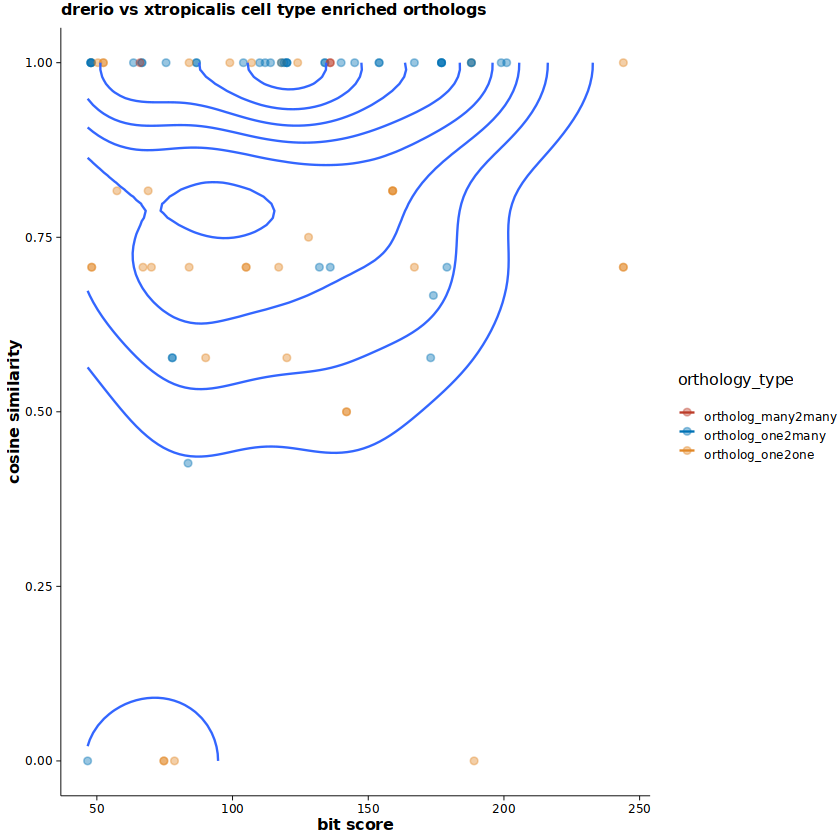

In [278]:
fig = df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_sp2", "gene_sp1")) %>% 
ggplot(aes(x = X12, y = cosine)) + geom_point(aes(color=orthology_type), alpha = 0.4) + common_0x +
labs(x = 'bit score', y = 'cosine similarity') + 
labs(title = paste0(species_1, " vs ", species_2 ," cell type enriched orthologs")) + geom_density_2d() +
scale_color_nejm()

fig

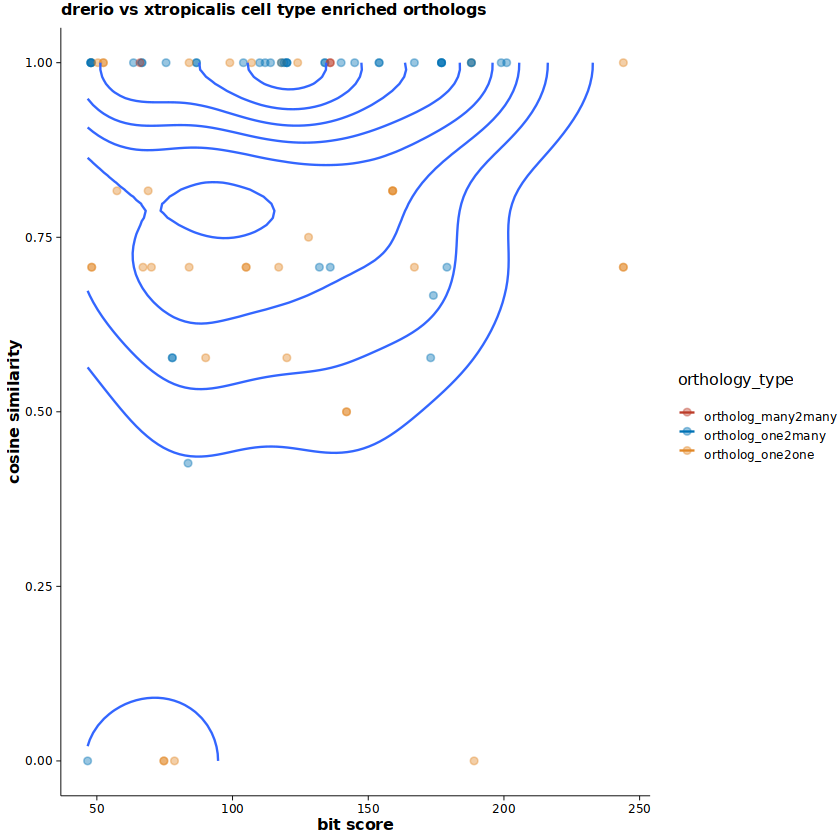

In [279]:
fig

In [140]:
saveRDS(fig, file = paste0( species_1, "_vs_", species_2 ,"_cell_type_enriched_orthologs.rds"))
ggsave(plot = fig, filename = paste0( species_1, "_vs_", species_2 ,"_cell_type_enriched_orthologs.pdf"), height = 3, width=3.75)

Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”


In [138]:
df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_sp2", "gene_sp1")) %>% 
            rename("species_2_peptide_id" = "mm_peptide_id") %>% 
            rename("species_1_peptide_id" = "cj_peptide_id") %>% 
rename("e_value" = "X11") %>% rename("bit score" = 'X12') %>% 
            write_csv(paste0(species_1, "_vs_", species_2 ,"_cell_type_enriched_orthologs.csv"))

In [38]:
pal_nejm()(4)

[1] "#BC3C29FF" "#0072B5FF" "#E18727FF" "#20854EFF"

In [40]:
type_pal = c("M2M" = '#BC3C29FF', "M2O" = "#0072B5FF", "O2M" = "#E18727FF", "O2O" = "#20854EFF")

In [41]:

all_pairs <- data.frame(
  species_1 = c('cjacchus', 'cjacchus', 'cjacchus', 'cjacchus', 'mmulatta', 'mmulatta', 'mmulatta', 'ggorilla', 'ggorilla', 'ptroglodytes', 'ptroglodytes'),
  species_2 = c('mmulatta', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ptroglodytes', 'hsapiens', 'hsapiens', 'hsapiens')
)

# Iterate over rows and assign values to species_1 and species_2
for (i in 1:nrow(all_pairs)) {
    species_1 <- all_pairs[i, 'species_1']
    species_2 <- all_pairs[i, 'species_2']

                        
 

species_1_short = substr(species_1, start = 1, stop = 2)
species_2_short = substr(species_2, start = 1, stop = 2)

            message(species_1)
            message(species_2)

cj_tbl = tbl %>% filter(s1.species_scientific_name == species_1) %>% 
filter(og.eggnog_dataset_name == 'primates') %>% 
unique() %>% 
pivot_wider(id_cols = c(g.external_gene_name, og.id, g.ensembl_peptide_id), names_from = c.cell_type_name, values_from = enh.specificity_score, values_fn = first, values_fill = 0) %>% 
arrange(og.id)

mm_tbl = tbl %>% filter(s1.species_scientific_name == species_2) %>% 
filter(og.eggnog_dataset_name == 'primates') %>% 
unique() %>% 
pivot_wider(id_cols = c(g.external_gene_name, og.id, g.ensembl_peptide_id), names_from = c.cell_type_name, values_from = enh.specificity_score, values_fn = first, values_fill = 0)%>% 
arrange(og.id)

og_shared = intersect(cj_tbl$og.id, mm_tbl$og.id)

cj_tbl_shared = cj_tbl  %>% filter(og.id %in% og_shared)

mm_tbl_shared = mm_tbl %>% filter(og.id %in% og_shared)

cj_tbl_shared_t = t(cj_tbl_shared)
colnames(cj_tbl_shared_t) = cj_tbl_shared_t['g.ensembl_peptide_id', ]
cj_tbl_shared_t = cj_tbl_shared_t[4:nrow(cj_tbl_shared_t), ]

mm_tbl_shared_t = t(mm_tbl_shared)
colnames(mm_tbl_shared_t) = mm_tbl_shared_t['g.ensembl_peptide_id', ]
mm_tbl_shared_t = mm_tbl_shared_t[4:nrow(mm_tbl_shared_t), ]


og_gene_mapping = cj_tbl_shared %>% select(g.external_gene_name, g.ensembl_peptide_id, og.id) %>% 
merge(mm_tbl_shared %>% select(g.external_gene_name, g.ensembl_peptide_id, og.id), by = 'og.id', suffixes = c("_cj", "_mm"), all = TRUE) 

og_gene_mapping = og_gene_mapping %>% group_by(og.id) %>% 
mutate(n_genes_in_og_sp1 = length(unique(g.external_gene_name_cj))) %>% 
mutate(n_genes_in_og_sp2 = length(unique(g.external_gene_name_mm))) %>% 
mutate(orthology_type = case_when(n_genes_in_og_sp1 == 1 & n_genes_in_og_sp2 == 1 ~ 'O2O', 
                               n_genes_in_og_sp1 == 1 & n_genes_in_og_sp2 > 1 ~ 'O2M',
                                 n_genes_in_og_sp1 > 1 & n_genes_in_og_sp2 == 1 ~ 'M2O',
                                 n_genes_in_og_sp1 > 1 & n_genes_in_og_sp2 > 1 ~ 'M2M'))


df_all = data.frame()

for(i in seq(1, nrow(og_gene_mapping))){

    gene_cj = og_gene_mapping[i, 'g.ensembl_peptide_id_cj']$g.ensembl_peptide_id_cj
    
    gene_mm = og_gene_mapping[i, 'g.ensembl_peptide_id_mm']$g.ensembl_peptide_id_mm

    orthology_type = og_gene_mapping[i, 'orthology_type']

    cosine = lsa::cosine(as.numeric(unname(cj_tbl_shared_t[, gene_cj])), as.numeric(unname(mm_tbl_shared_t[, gene_mm])))

    dot = as.numeric(unname(cj_tbl_shared_t[, gene_cj])) %*% as.numeric(unname(mm_tbl_shared_t[, gene_mm]))

    corr = cor(as.numeric(unname(cj_tbl_shared_t[, gene_cj])), as.numeric(unname(mm_tbl_shared_t[, gene_mm])), method = 'spearman')

    mand = manhattanDistance(as.numeric(unname(cj_tbl_shared_t[, gene_cj])), as.numeric(unname(mm_tbl_shared_t[, gene_mm])))

    df_add = data.frame(gene_mm = gene_mm, gene_cj = gene_cj, cosine = cosine, dot = dot, corr = corr, mand = mand, orthology_type = orthology_type)

    

    df_all = rbind(df_all, df_add)

    
}


            df_blast = read_tsv(paste0("/nfs/research/irene/ysong/RESULTS/BLAST/genespectra_MTG/", species_1_short, "_to_", species_2_short, "_all.txt"), col_names = NA)
            
            head(df_blast)
            
            df_blast_new = df_blast %>% 
            mutate(mm_peptide_id = gsub("\\..$", "", X2))%>% 
            mutate(cj_peptide_id = gsub("\\..$", "", X1))
            
            fig = df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
            merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
            ggplot(aes(x = X12, y = cosine)) + geom_point(aes(color=orthology_type), alpha = 0.4) + common_0x +
            labs(x = 'bit score', y = 'cosine similarity') + 
            labs(title = paste0(species_1, " vs ", species_2 ," cell type enhanced orthologs")) + geom_density_2d() +
    scale_color_manual(values = type_pal)

            saveRDS(fig, file = paste0("enhanced_bit_score_cosine_sim_density/", species_1, "_vs_", species_2 ,"_cell_type_enhanced_orthologs.rds"))
            ggsave(plot = fig, filename = paste0("enhanced_bit_score_cosine_sim_density/", species_1, "_vs_", species_2 ,"_cell_type_enhanced_orthologs.pdf"))

            df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
            merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
                        rename("species_2_peptide_id" = "mm_peptide_id") %>% 
                        rename("species_1_peptide_id" = "cj_peptide_id") %>% 
            rename("e_value" = "X11") %>% rename("bit score" = 'X12') %>% 
                        write_csv(paste0("enhanced_bit_score_cosine_sim_density/", species_1, "_vs_", species_2 ,"_cell_type_enhanced_orthologs.csv"))
            

}


cjacchus

mmulatta

Rows: 449760 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): X1, X2
dbl (10): X3, X4, X5, X6, X7, X8, X9, X10, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Saving 6.67 x 6.67 in image

Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
cjacchus

ggorilla

Rows: 376573 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): X1, X2
dbl (10): X3, X4, X5, X6, X7, X8, X9, X10, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Saving 6.67 x 6.67 in image

Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
cjacchus

ptroglodytes

Rows: 436373

species_1 = 'hsapiens'
fig_list = list()
    for(species_2 in all_species){

        if(species_1 != species_2){


            fig = readRDS(paste0(species_1, " vs ", species_2 ," cell type enhanced orthologs.rds"))

            fig_list[[species_2]] = fig

            }}

In [81]:
options(repr.plot.height = 10, repr.plot.width = 10)

plot_grid(fig_list[['ptroglodytes']] + geom_density_2d(), 
          fig_list[['ggorilla']] + geom_density_2d(),
         fig_list[['mmulatta']] + geom_density_2d(), 
          fig_list[['cjacchus']] + geom_density_2d(), 
          ncol = 2)

In [42]:

fig_list = list()

all_pairs <- data.frame(
  species_1 = c('cjacchus', 'cjacchus', 'cjacchus', 'cjacchus', 'mmulatta', 'mmulatta', 'mmulatta', 'ggorilla', 'ggorilla', 'ptroglodytes', 'ptroglodytes'),
  species_2 = c('mmulatta', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ptroglodytes', 'hsapiens', 'hsapiens', 'hsapiens')
)

# Iterate over rows and assign values to species_1 and species_2
for (i in 1:nrow(all_pairs)) {
    species_1 <- all_pairs[i, 'species_1']
    species_2 <- all_pairs[i, 'species_2']

            fig = readRDS(paste0("enhanced_bit_score_cosine_sim_density/", species_1, "_vs_", species_2 ,"_cell_type_enhanced_orthologs.rds"))

            fig_list[[i]] = fig

            }

In [43]:
row_1 = plot_grid(fig_list[[1]] + theme(legend.position  = 'none'), 
          fig_list[[2]] + theme(legend.position  = 'none'), 
          fig_list[[3]] + theme(legend.position  = 'none'), 
          fig_list[[4]] + theme(legend.position  = 'none'), nrow = 1)

In [44]:
row_2 = plot_grid(fig_list[[5]] + theme(legend.position  = 'none'), 
          fig_list[[6]] + theme(legend.position  = 'none'), 
          fig_list[[7]] + theme(legend.position  = 'none'),
          element_blank(), nrow = 1)

Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”


In [45]:
row_3 = plot_grid(fig_list[[8]] + theme(legend.position  = 'none'), 
          fig_list[[9]] + theme(legend.position  = 'none'), element_blank(),element_blank(),nrow = 1)

Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”


In [46]:
row_4 = plot_grid(fig_list[[10]] + theme(legend.position  = 'none'), element_blank(),element_blank(),element_blank(), nrow = 1)

Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”


In [47]:
options(repr.plot.height = 10, repr.plot.width = 10)

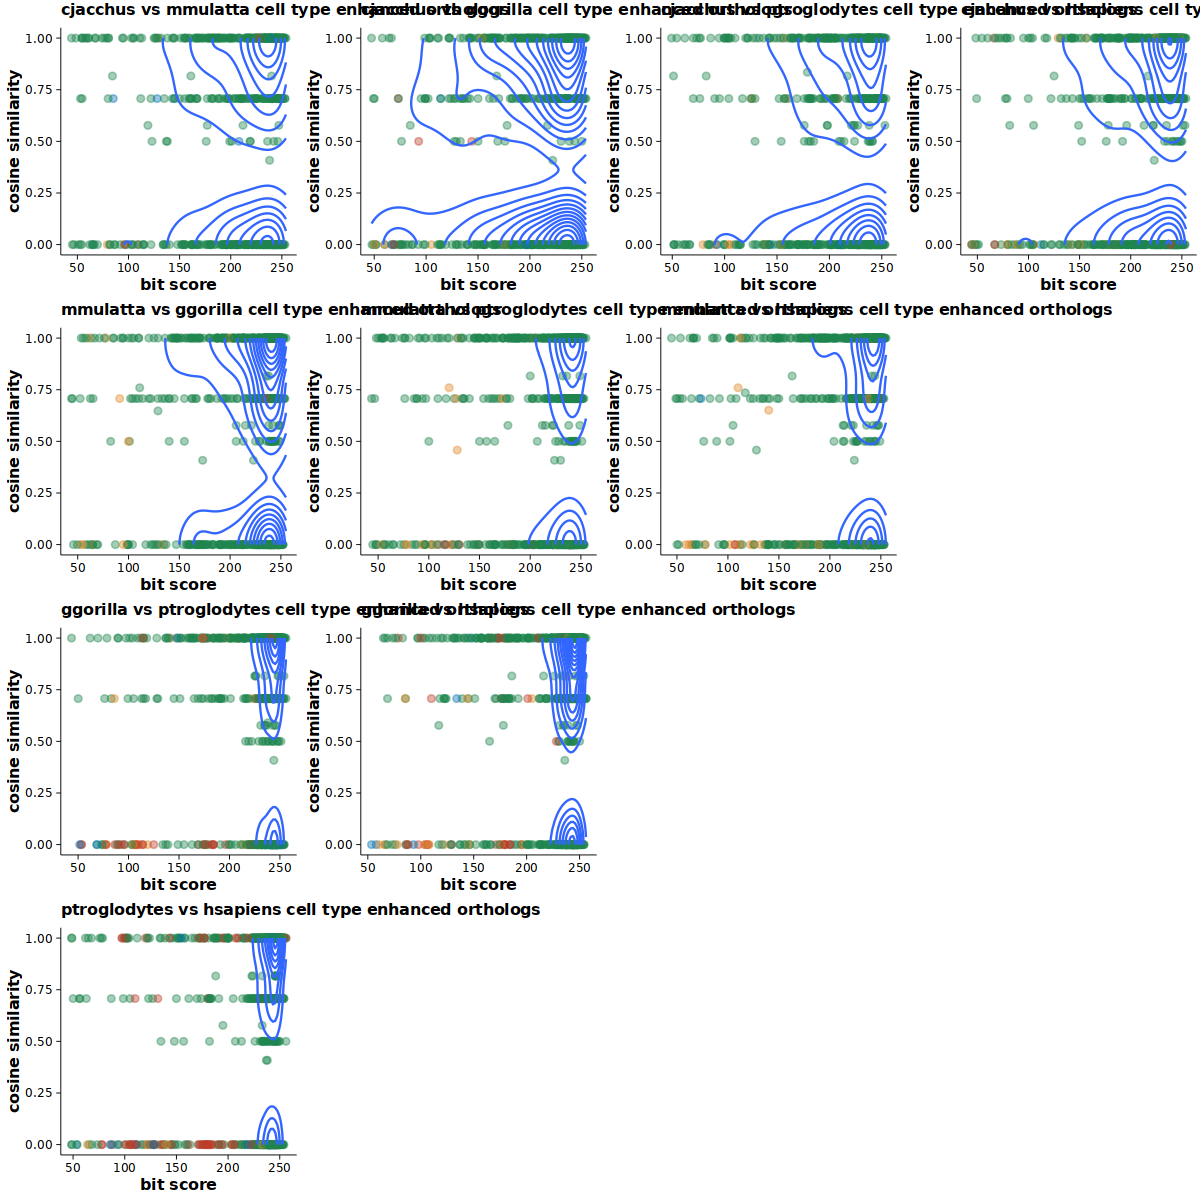

In [48]:
plot_grid(row_1, row_2, row_3, row_4, nrow = 4, align = 'v', axis = 'l')

In [49]:
pdf('all_species_paird_bit_vs_cosine_enhanced.pdf', height = 10, width = 10)

plot_grid(row_1, row_2, row_3, row_4, nrow = 4, align = 'v', axis = 'l')

dev.off()

png 
  2

In [50]:
df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
            merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
                        rename("species_2_peptide_id" = "mm_peptide_id") %>% 
                        rename("species_1_peptide_id" = "cj_peptide_id") %>% 
            rename("e_value" = "X11") %>% rename("bit score" = 'X12') 

species_2_peptide_id,species_1_peptide_id,e_value,bit score,cosine,dot,corr,mand,orthology_type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSP00000001146,ENSPTRP00000080569,8.41e-86,244.0,1.0000000,30.05359,1.00000000,2.685485,O2O
ENSP00000002596,ENSPTRP00000027421,1.28e-85,244.0,1.0000000,17.21531,1.00000000,0.066896,O2O
ENSP00000004982,ENSPTRP00000018605,1.67e-83,239.0,1.0000000,139.48593,1.00000000,2.907730,O2O
ENSP00000020945,ENSPTRP00000034651,2.59e-83,238.0,0.0000000,0.00000,-0.05000000,18.013590,O2O
ENSP00000054950,ENSPTRP00000089283,1.58e-84,241.0,0.0000000,0.00000,-0.05000000,10.989011,O2O
ENSP00000075503,ENSPTRP00000081538,1.45e-83,239.0,1.0000000,23.52471,1.00000000,0.555325,O2O
ENSP00000078429,ENSPTRP00000091799,1.77e-64,191.0,0.0000000,0.00000,-0.07254763,23.603847,O2O
ENSP00000080059,ENSPTRP00000088885,3.57e-65,192.0,1.0000000,26.51494,1.00000000,0.175744,O2O
ENSP00000160262,ENSPTRP00000093526,7.56e-85,242.0,0.0000000,0.00000,-0.05000000,16.648725,O2O


In [51]:
row_1_new = plot_grid(fig_list[[4]] + theme(legend.position  = 'none'), 
          fig_list[[3]] + theme(legend.position  = 'none'), 
          fig_list[[2]] + theme(legend.position  = 'none'), 
          fig_list[[1]] + theme(legend.position  = 'none'), nrow = 1)

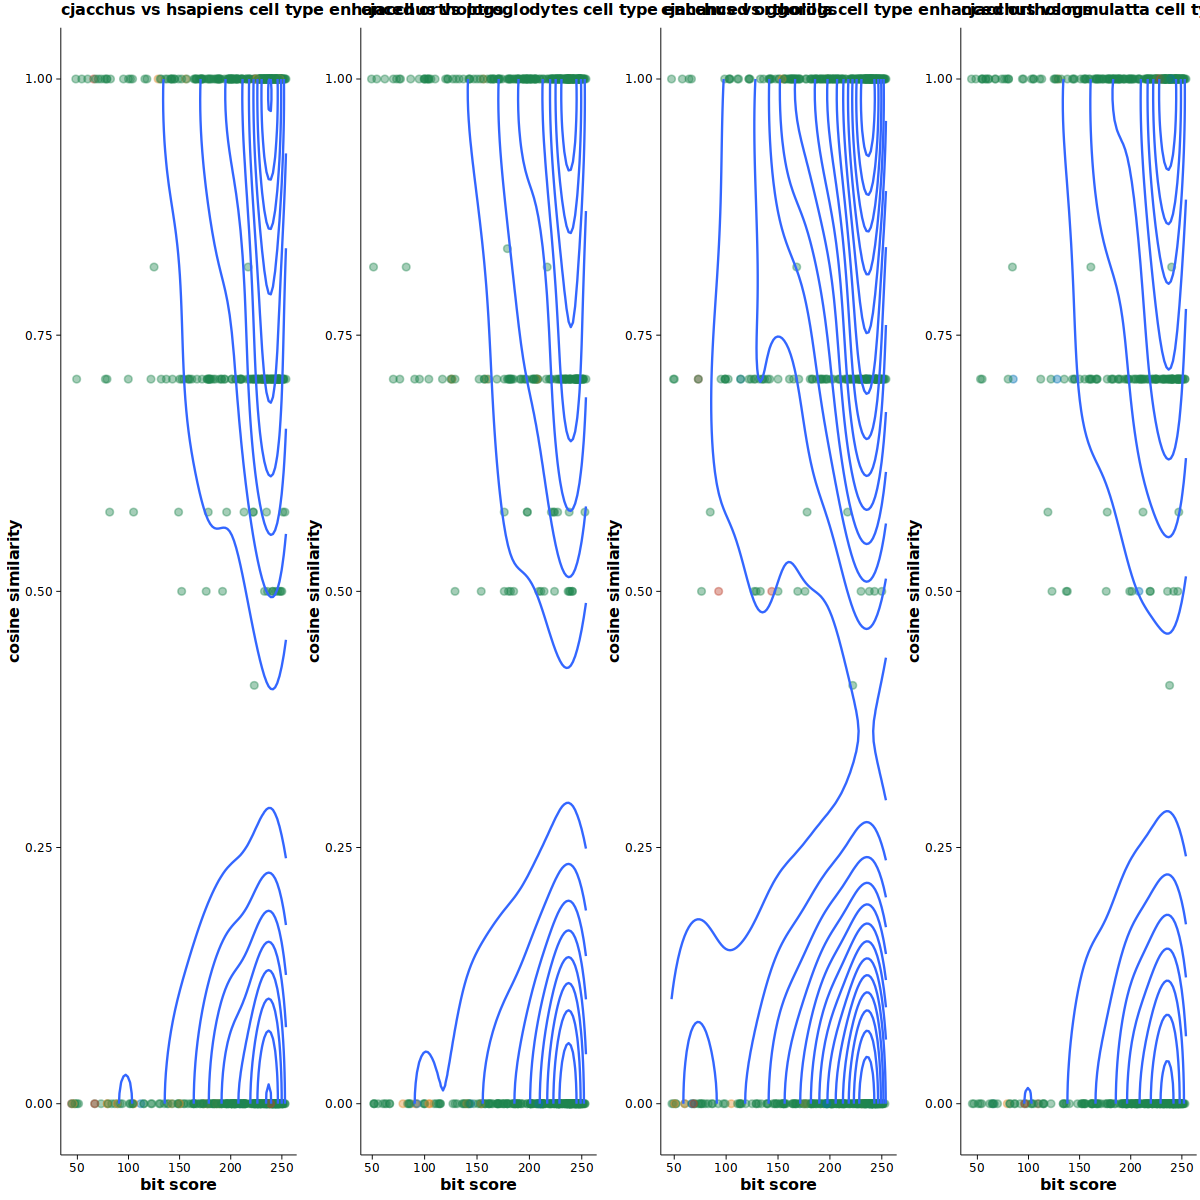

In [52]:
row_1_new

In [53]:
row_2_new = plot_grid(fig_list[[7]] + theme(legend.position  = 'none'), 
          fig_list[[6]] + theme(legend.position  = 'none'), 
          fig_list[[5]] + theme(legend.position  = 'none'),
          element_blank(), nrow = 1)

Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”


In [54]:
row_3_new = plot_grid(fig_list[[9]] + theme(legend.position  = 'none'), 
          fig_list[[8]] + theme(legend.position  = 'none'), element_blank(),element_blank(),nrow = 1)

Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”


In [55]:
row_4_new = plot_grid(fig_list[[10]] + theme(legend.position  = 'none'), element_blank(),element_blank(),element_blank(), nrow = 1)

Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”


In [56]:
options(repr.plot.height = 10, repr.plot.width = 10)

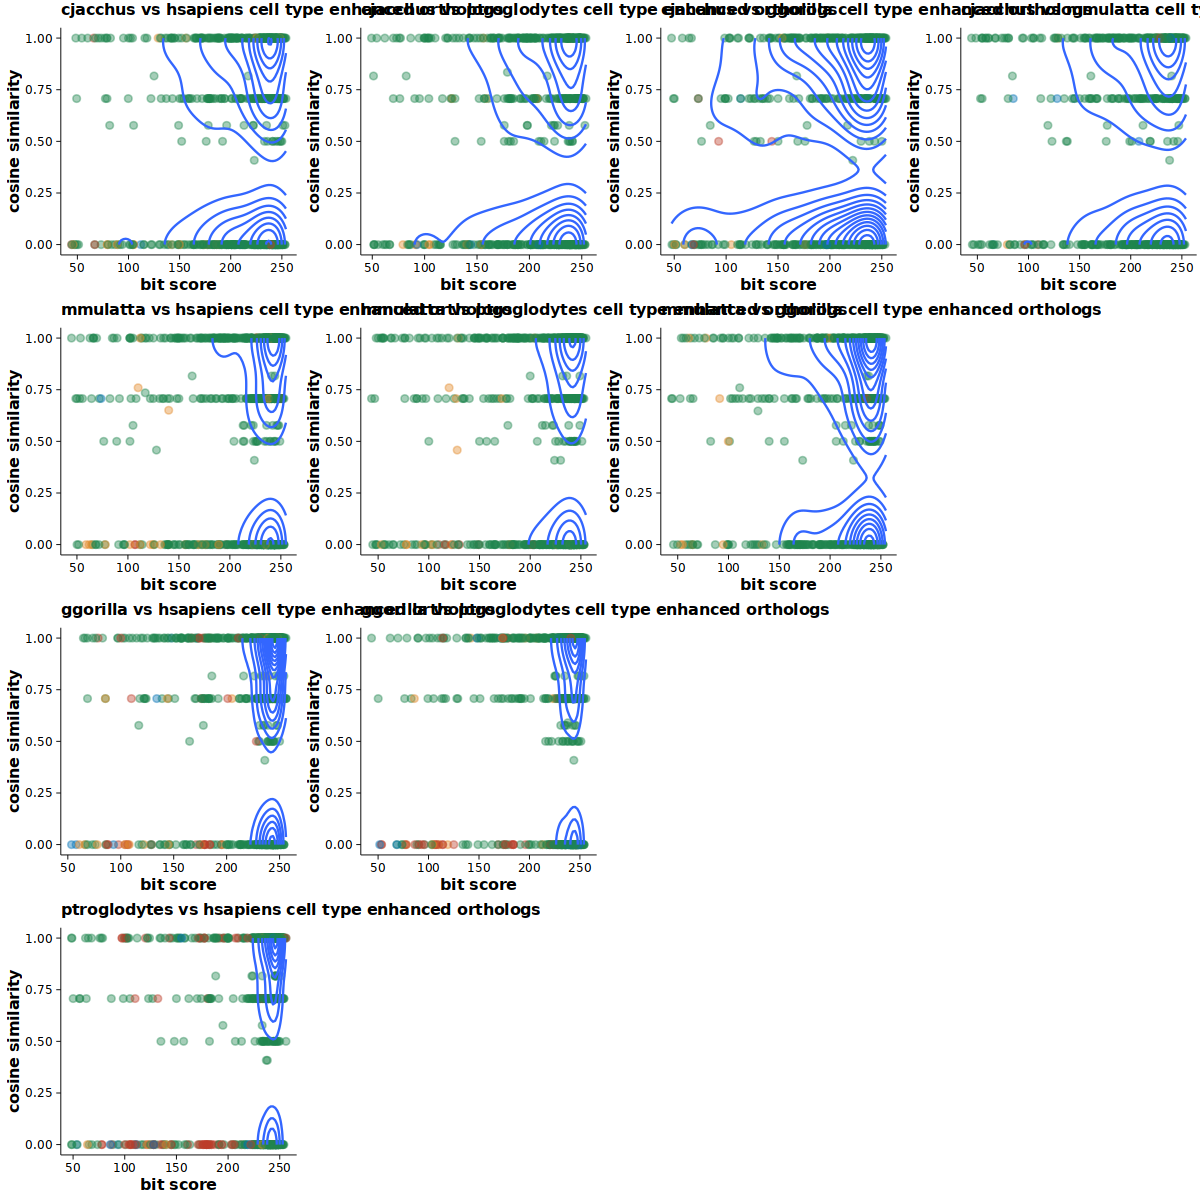

In [57]:
plot_grid(row_1_new, row_2_new, row_3_new, row_4_new, nrow = 4, align = 'v', axis = 'l')

In [58]:
pdf('all_species_paird_bit_vs_cosine_heatmap_enhanced_order.pdf', height = 10, width = 10)

plot_grid(row_1_new, row_2_new, row_3_new, row_4_new, nrow = 4, align = 'v', axis = 'l')

dev.off()

png 
  2